In [1]:
 from skimage.io import imshow, imread
 from skimage.color import rgb2gray
 from skimage.filters import threshold_otsu
 from skimage.morphology import closing
 from skimage.measure import label, regionprops, regionprops_table
 from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report
 from matplotlib import pyplot as plt
 import pandas as pd
 import numpy as np
 from tqdm import tqdm 
 import os

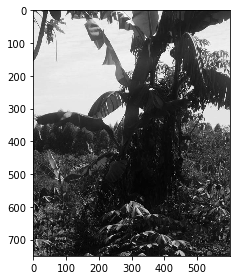

In [2]:
 # get the filenames of the leaves under the directory “Leaves”
 image_path_list = os.listdir("bananas_cropped")
 # looking at the first image
 i = 0
 image_path = image_path_list[i]
 image = rgb2gray(imread("bananas_cropped/"+image_path))
 imshow((image))

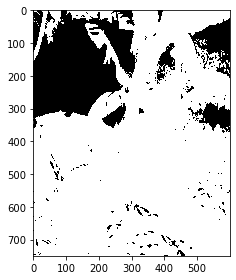

In [3]:
binary = image < threshold_otsu(image)
binary = closing(binary)
imshow(binary)

c:\Users\DELL\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


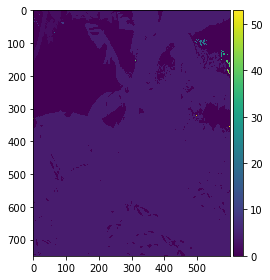

In [4]:
label_img = label(binary)
imshow(label_img)

In [5]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor','perimeter',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[5]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,major_axis_length,minor_axis_length,convex_ratio,label
0,100,67,0.928480,0.348958,14.409000,-7.719091,-7.719091,7.772332,39.142136,17.660256,6.558708,0.670000,a
1,8181,4506,0.939233,0.309989,472.742618,583.990368,583.990368,1489.599426,815.387914,167.593480,57.531714,0.550788,a
2,5286,3533,0.978431,0.526685,1761.567844,-88.883829,-88.883829,80.055719,631.043723,168.107258,34.726456,0.668369,a
3,416969,339640,0.677777,0.754756,26808.476013,7470.201664,7470.201664,39973.186802,11148.016767,832.800600,612.331418,0.814545,a
4,28,25,0.806743,0.714286,3.510400,0.819200,0.819200,1.641600,18.071068,7.816552,4.618822,0.892857,a
5,6,5,0.973723,0.416667,0.560000,-0.680000,-0.680000,1.040000,4.414214,4.933332,1.123493,0.833333,a
6,73,44,0.999439,0.074074,24.204029,-44.853306,-44.853306,83.657025,44.278175,41.519196,1.390411,0.602740,a
7,31,30,0.731777,0.714286,2.805556,-1.011111,-1.011111,2.728889,19.656854,7.775922,5.299637,0.967742,a
8,48,40,0.848393,0.571429,6.050000,-1.087500,-1.087500,2.049375,24.727922,10.061019,5.325964,0.833333,a
9,6,6,1.000000,1.000000,0.000000,-0.000000,-0.000000,2.916667,4.000000,6.831301,0.000000,1.000000,a


In [21]:
image_path_list = os.listdir("bananas_cropped")
df = pd.DataFrame()
for i in range(len(image_path_list)):
   
  image_path = image_path_list[i]
  image = rgb2gray(imread("bananas_cropped/"+image_path))
  binary = image < threshold_otsu(image)
  binary = closing(binary)
  label_img = label(binary)
  
  table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent', 'image' ,                 
                                        'inertia_tensor','perimeter',
                                        'major_axis_length', 
                                        'minor_axis_length','solidity','orientation',
                                        'moments_central',
                                        'moments_hu',
                                        'euler_number',
                                        'equivalent_diameter',
                                        'mean_intensity',
                                        'bbox']))
  table['perimeter_area_ratio'] = table['perimeter']/table['area']
  real_images = []
  std = []
  mean = []
  percent25 = []
  percent75 = []
  for prop in regionprops(label_img): 
      
      min_row, min_col, max_row, max_col = prop.bbox
      img = image[min_row:max_row,min_col:max_col]
      real_images += [img]
      mean += [np.mean(img)]
      std += [np.std(img)]
      percent25 += [np.percentile(img, 25)] 
      percent75 += [np.percentile(img, 75)]
  table['real_images'] = real_images
  table['mean_intensity'] = mean
  table['std_intensity'] = std
  table['25th Percentile'] = mean
  table['75th Percentile'] = std
  table['iqr'] = table['75th Percentile'] - table['25th Percentile']
  table['label'] = image_path[5]
  df = pd.concat([df, table], axis=0)
df.head()

,convex_area,area,eccentricity,extent,image,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,100,67,0.928480,0.348958,"[[True, True, True, True, True, True, True, Tr...",14.409000,-7.719091,-7.719091,7.772332,39.142136,...,2,12,18,0.584211,"[[0.3216133333333333, 0.5529858823529412, 0.32...",0.260829,0.676630,0.260829,-0.415801,a
1,8181,4506,0.939233,0.309989,"[[False, False, False, False, False, False, Fa...",472.742618,583.990368,583.990368,1489.599426,815.387914,...,0,158,92,0.180956,"[[0.9412211764705882, 0.6235741176470588, 0.32...",0.274357,0.698523,0.274357,-0.424167,a
2,5286,3533,0.978431,0.526685,"[[False, False, False, False, True, True, True...",1761.567844,-88.883829,-88.883829,80.055719,631.043723,...,101,43,257,0.178614,"[[0.919114117647059, 0.930610980392157, 0.9398...",0.268902,0.583884,0.268902,-0.314983,a
3,416969,339640,0.677777,0.754756,"[[False, False, False, False, False, False, Fa...",26808.476013,7470.201664,7470.201664,39973.186802,11148.016767,...,0,750,600,0.032823,"[[0.9412211764705882, 0.6235741176470588, 0.32...",0.313699,0.332155,0.313699,-0.018456,a
4,28,25,0.806743,0.714286,"[[True, True, False, True, True, False, True],...",3.510400,0.819200,0.819200,1.641600,18.071068,...,257,11,264,0.722843,"[[0.5090152941176471, 0.4776427450980392, 0.52...",0.113049,0.501020,0.113049,-0.387971,a


In [22]:
X = df.drop(columns=['label', 'image', 'real_images'])
#X=df
#features
X = X[['iqr','75th Percentile','inertia_tensor-1-1',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=123, stratify=y)

In [23]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 96.46181172291297


In [34]:
df[9]

KeyError: 9

In [24]:
print(f"Test Accuracy: {np.mean(gnb.predict(X_test) ==y_test)*100:.2f}%")

Test Accuracy: 96.46%


In [25]:
#print confusion matrix of test set
print(classification_report(gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           a       0.87      0.97      0.92      2890
           v       0.99      0.96      0.98     11185

    accuracy                           0.96     14075
   macro avg       0.93      0.97      0.95     14075
weighted avg       0.97      0.96      0.97     14075



In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
#KNeighborsClassifier(...)
print(neigh.predict(X_test))




['v' 'a' 'v' ... 'v' 'v' 'v']


In [36]:
print(f"Test Accuracy: {np.mean(neigh.score(X_test,y_test))*100:.2f}%")


Test Accuracy: 99.21%


In [27]:
print(neigh.predict_proba(X_test))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [28]:
#print confusion matrix of test set
print(classification_report(neigh.predict(X_test), y_test))

              precision    recall  f1-score   support

           a       0.97      0.99      0.98      3129
           v       1.00      0.99      0.99     10946

    accuracy                           0.99     14075
   macro avg       0.98      0.99      0.99     14075
weighted avg       0.99      0.99      0.99     14075

